In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기본 폰트 설정
plt.rc("font", family="Malgun Gothic")
# '-' 기호 표시 설정
plt.rc("axes", unicode_minus=False)
# 선명도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
# 스타일 변경
plt.style.use("fivethirtyeight")

In [2]:
data = "data/seoul-covid19_6_30_.csv"
data

'data/seoul-covid19_6_30_.csv'

In [3]:
df = pd.read_csv(data)
df.shape

(1321, 7)

In [4]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [5]:
# 연번 기준 역순으로 정렬
df = df.sort_values(by="연번", ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


# 확진일 시각화

In [7]:
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.18.     1
5.17.     1
5.01.     1
2.6.      1
5.9.      1
Name: 확진일, Length: 131, dtype: int64

In [8]:
# 확진일 데이터가 날짜가 아닌 문자 타입
df["확진일"].head()

0    6.30.
1    6.30.
2    6.30.
3    6.30.
4    6.30.
Name: 확진일, dtype: object

In [13]:
# 데이터타입 날짜형태로 변환

df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]]

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


In [18]:
# 월만 추출

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].head()

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6


In [20]:
# 해당 연도의 몇 번째 주인가?

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

<ipython-input-20-898aa8597102>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


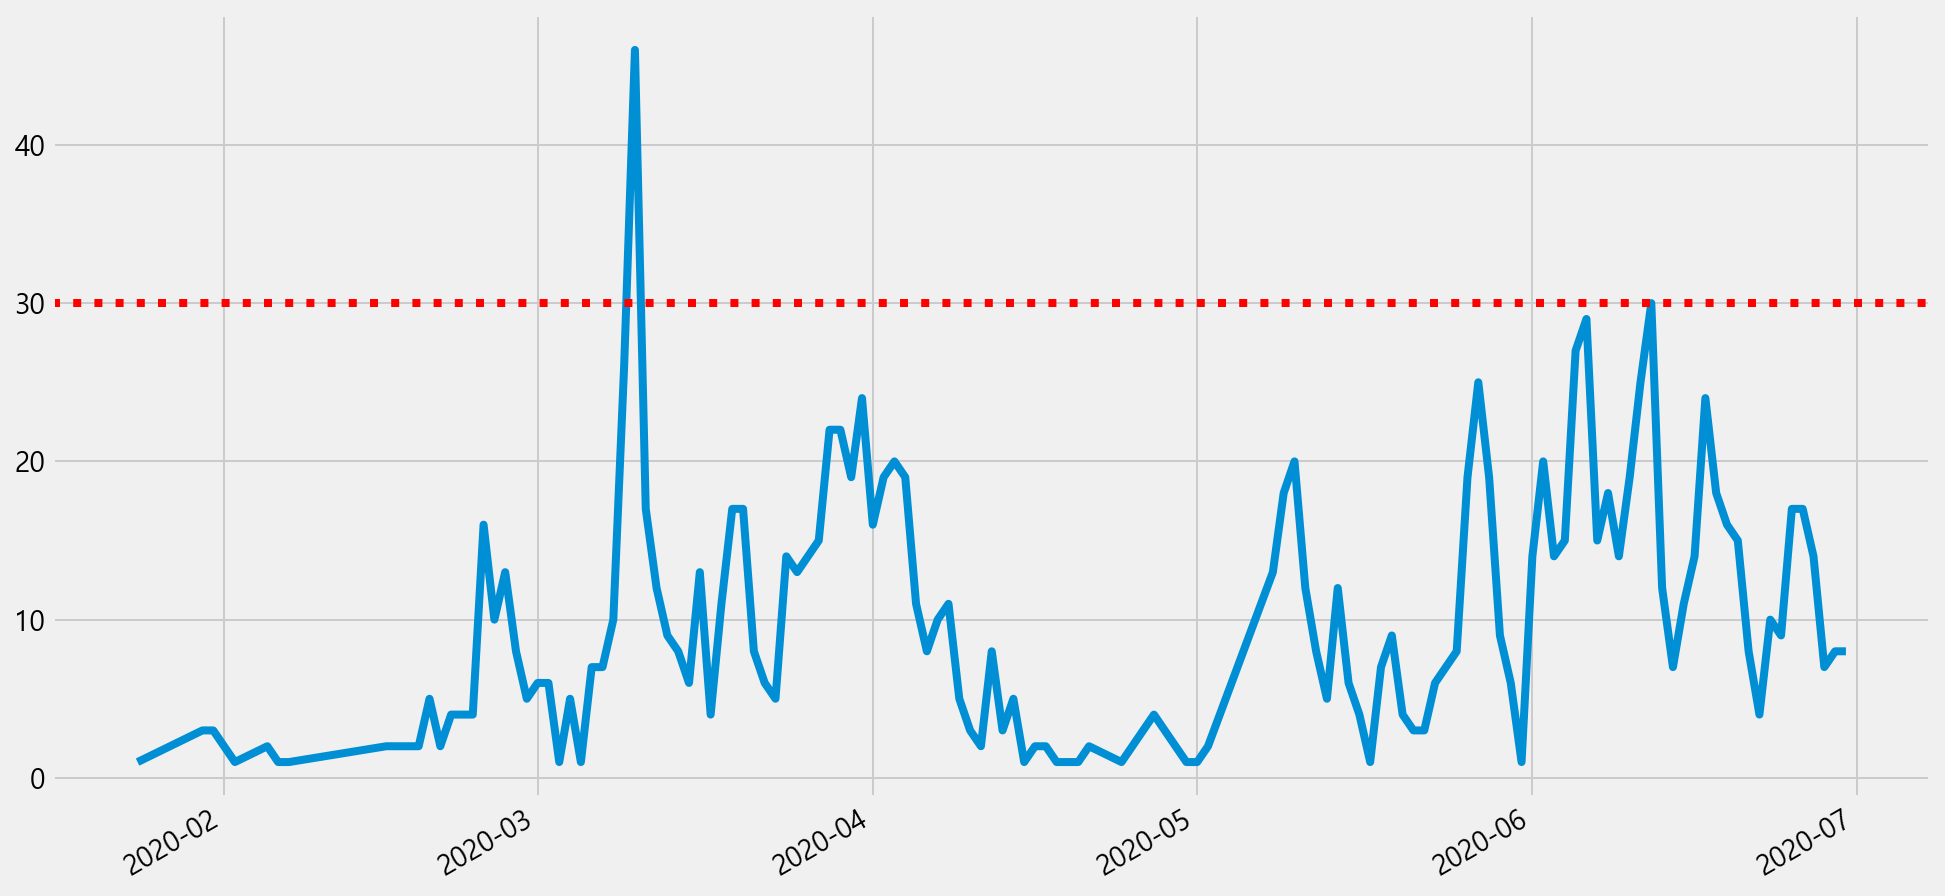

In [32]:
# 확진일자 기준으로 선 그래프 그리기

df["확진일자"].value_counts().plot(figsize = (15,8))
plt.axhline(30, color="red", linestyle=':')

In [43]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_counts = df["월일"].value_counts().sort_index()

day_counts.iloc[1]

3

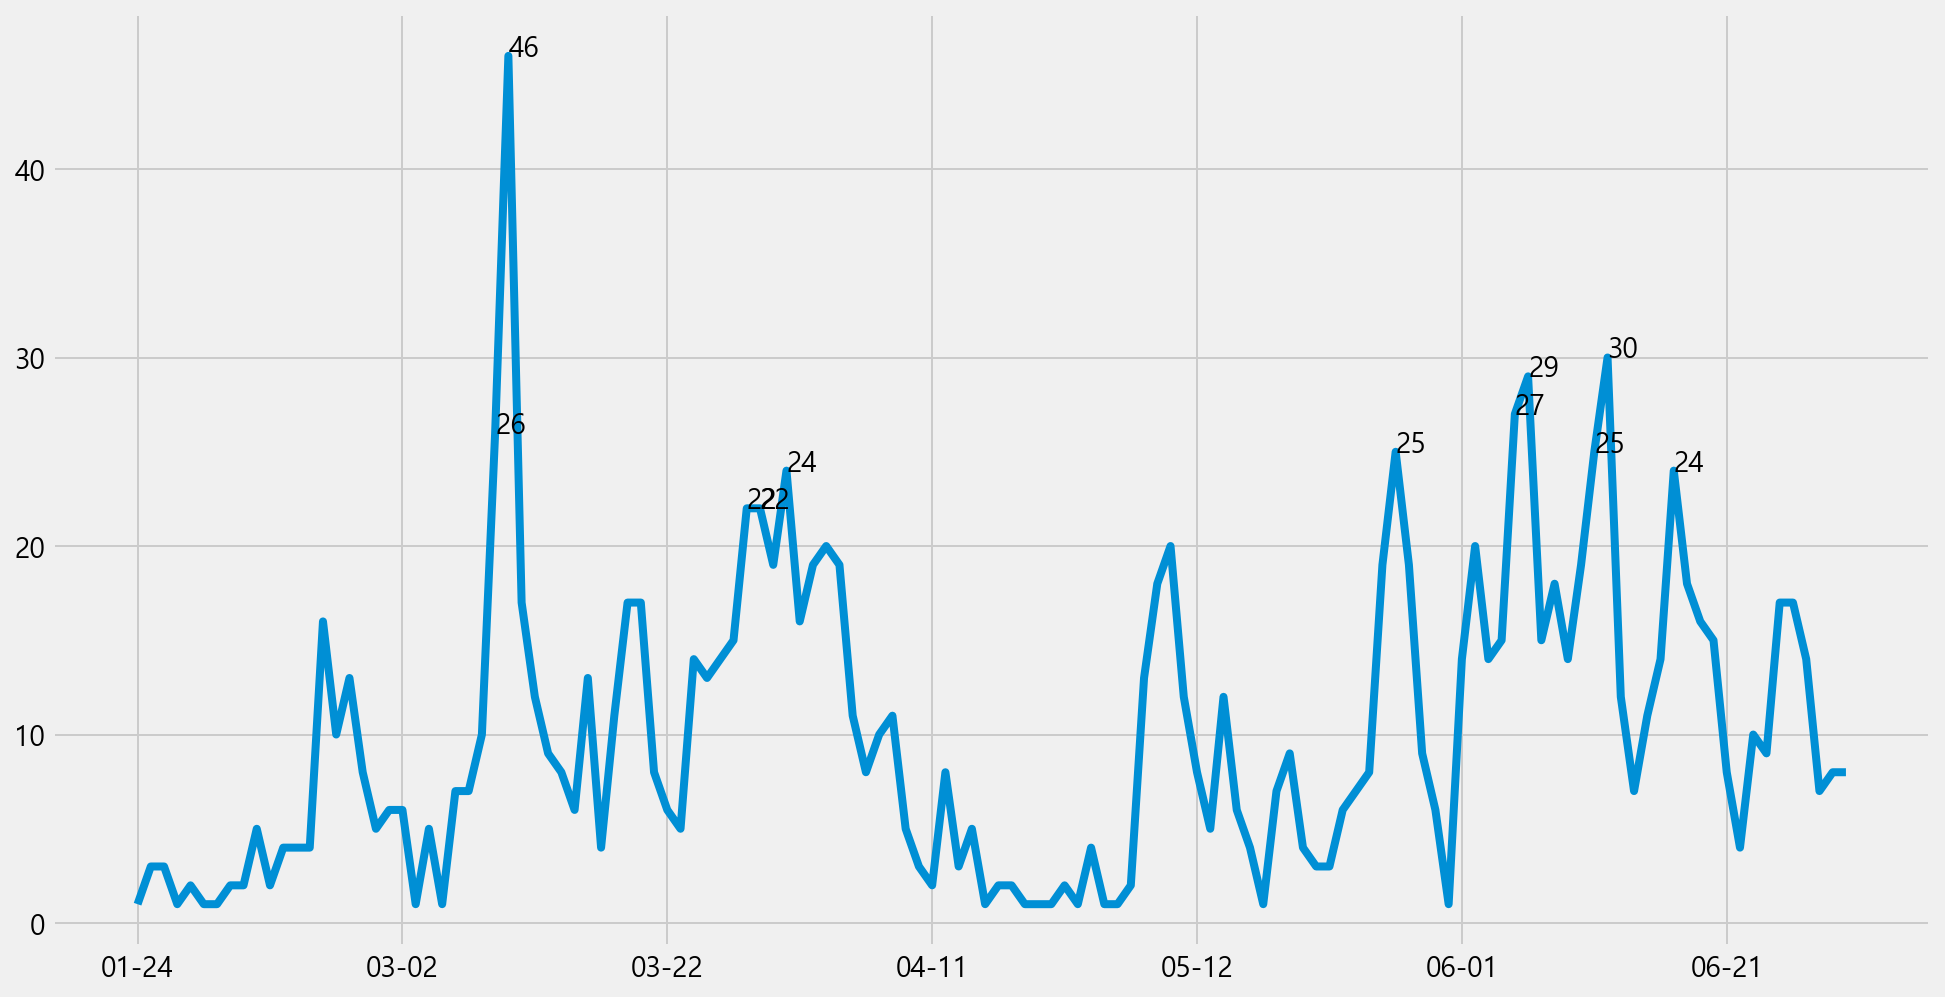

In [53]:
# 20건 이상 발생한 날 표시
g = day_counts.plot(figsize = (15,8))
for i in range(len(day_counts)):
    case_count = day_counts.iloc[i]
    if case_count > 20:
        g.text(x = i, y = case_count, s = case_count)

## 확진자가 가장 많이 나온 날

In [54]:
day_counts.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [57]:
day_counts[day_counts == day_counts.max()]

03-10    46
Name: 월일, dtype: int64

In [61]:
df[df["월일"] == '03-10']

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1124,197,7524,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1125,196,7619,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1126,195,7795,3.10.,관악구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1127,194,7787,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1128,193,7826,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 확진자가 가장 많이 나온 날 콜센터 관련 집단 감염이 있었다

<AxesSubplot:>

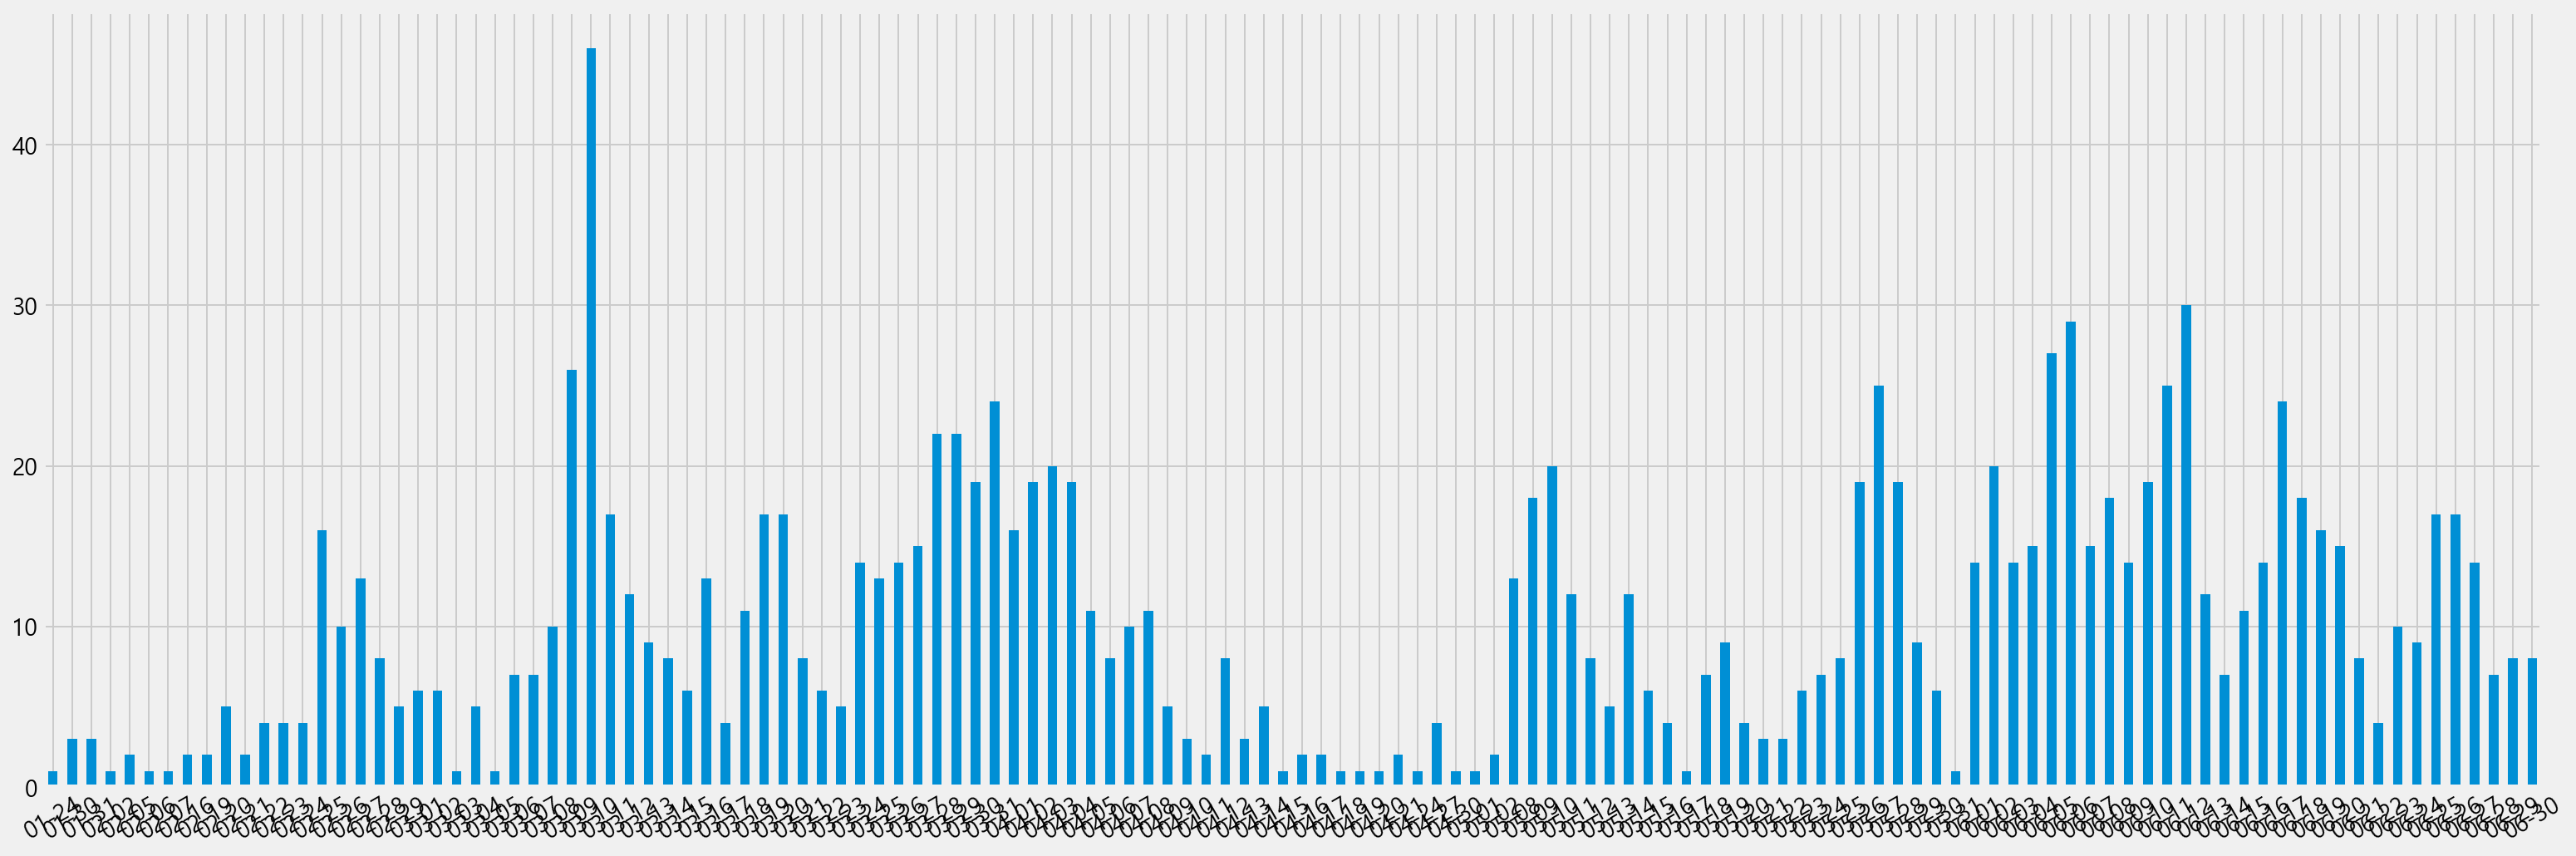

In [65]:
day_counts.plot.bar(figsize = (24,8))

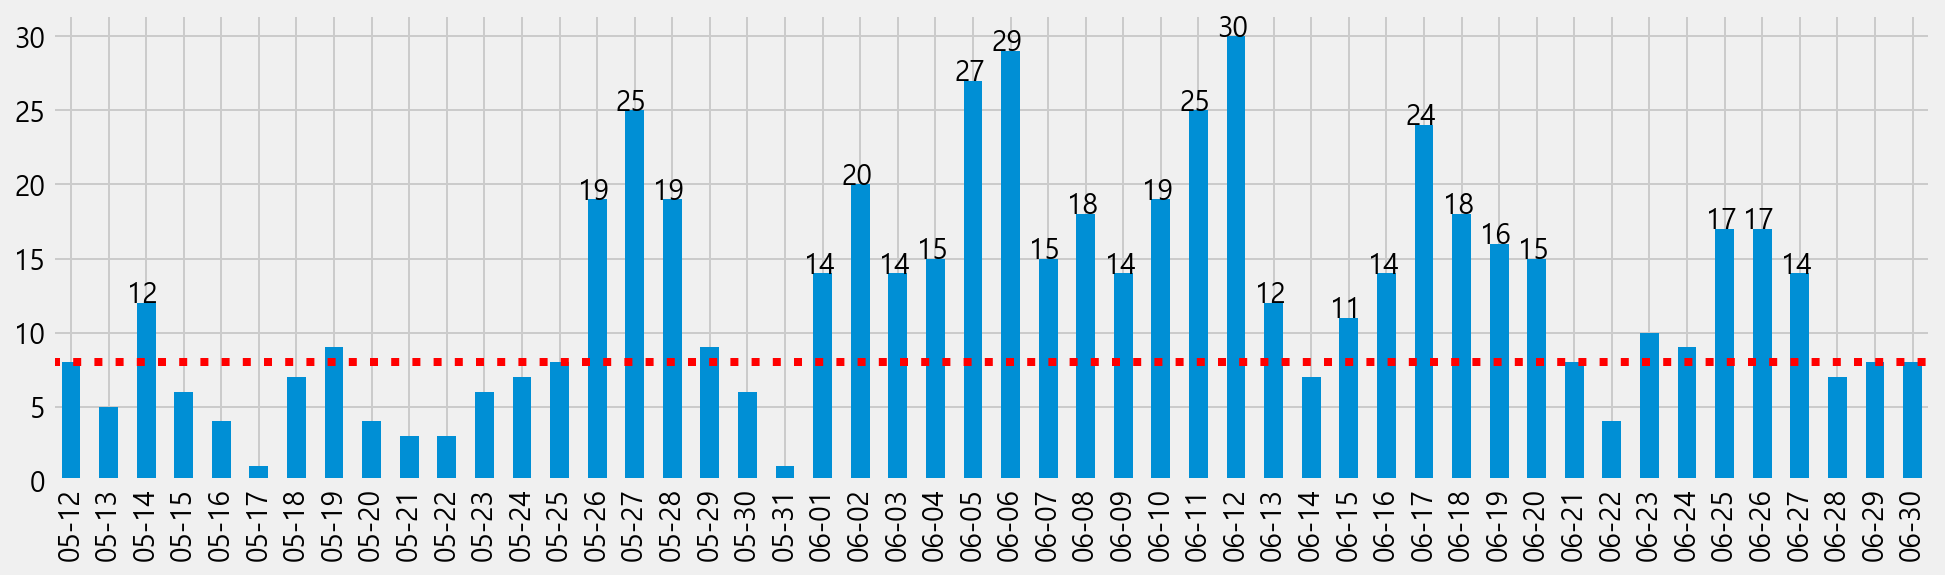

In [75]:
# 최근 50일 데이터 시각화

g = day_counts[-50:].plot.bar(figsize = (15,4))
g.axhline(day_counts.median(), linestyle=":", color='red')

for i in range(50):
    case_count = day_counts[-50:].iloc[i]
    if case_count > 10:
        g.text(x = i-0.5, y = case_count, s = case_count)

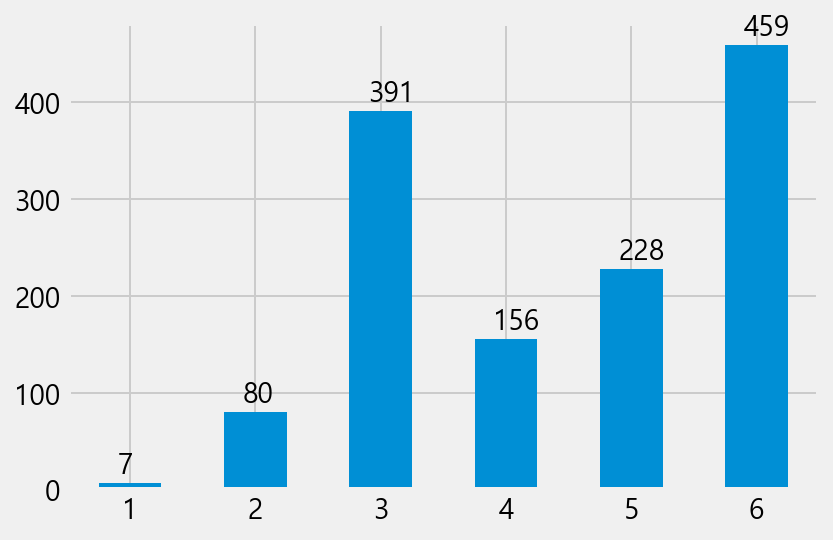

In [91]:
month_case = df['월'].value_counts().sort_index()
g = month_case.plot.bar(rot=0)
for i in range(len(month_case)):
    g.text(x = i-0.1, y = month_case.iloc[i]+10, s = month_case.iloc[i])

### 6월이 가장 많은 확진자가 나왔다

<AxesSubplot:>

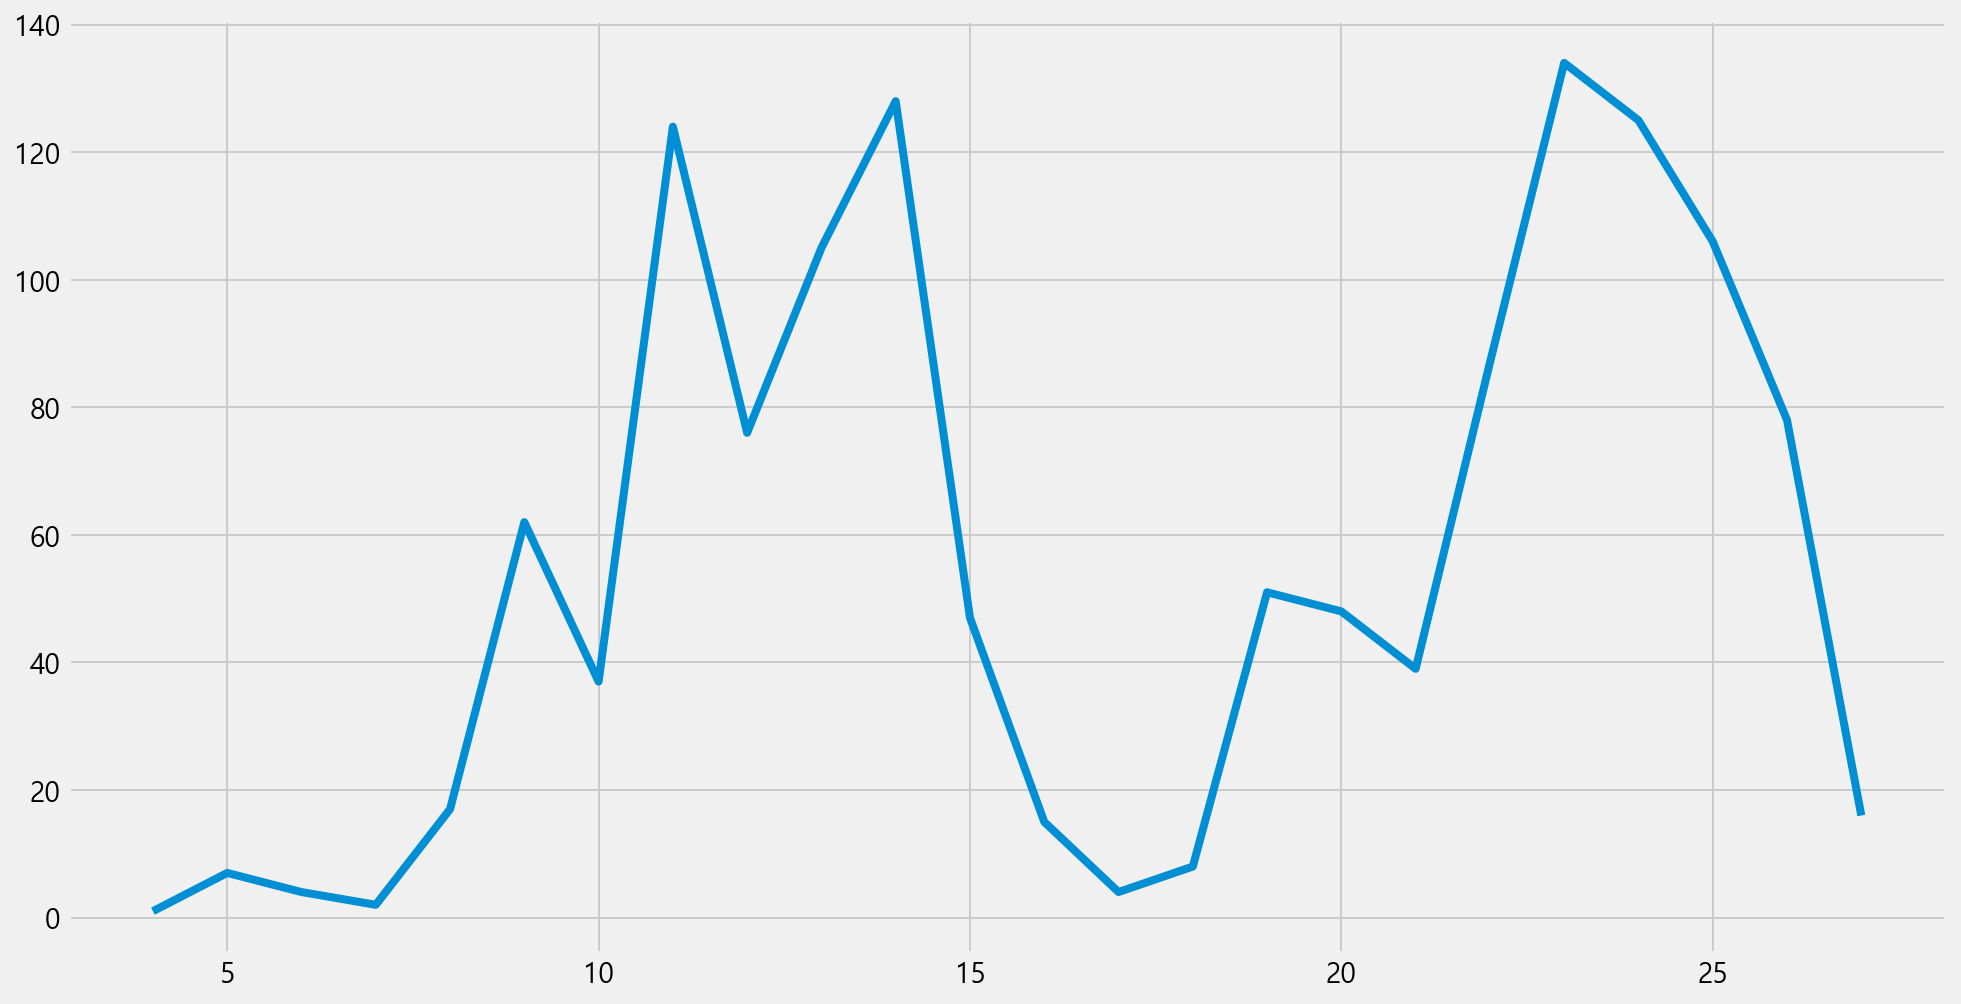

In [96]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize = (15,8))

<AxesSubplot:>

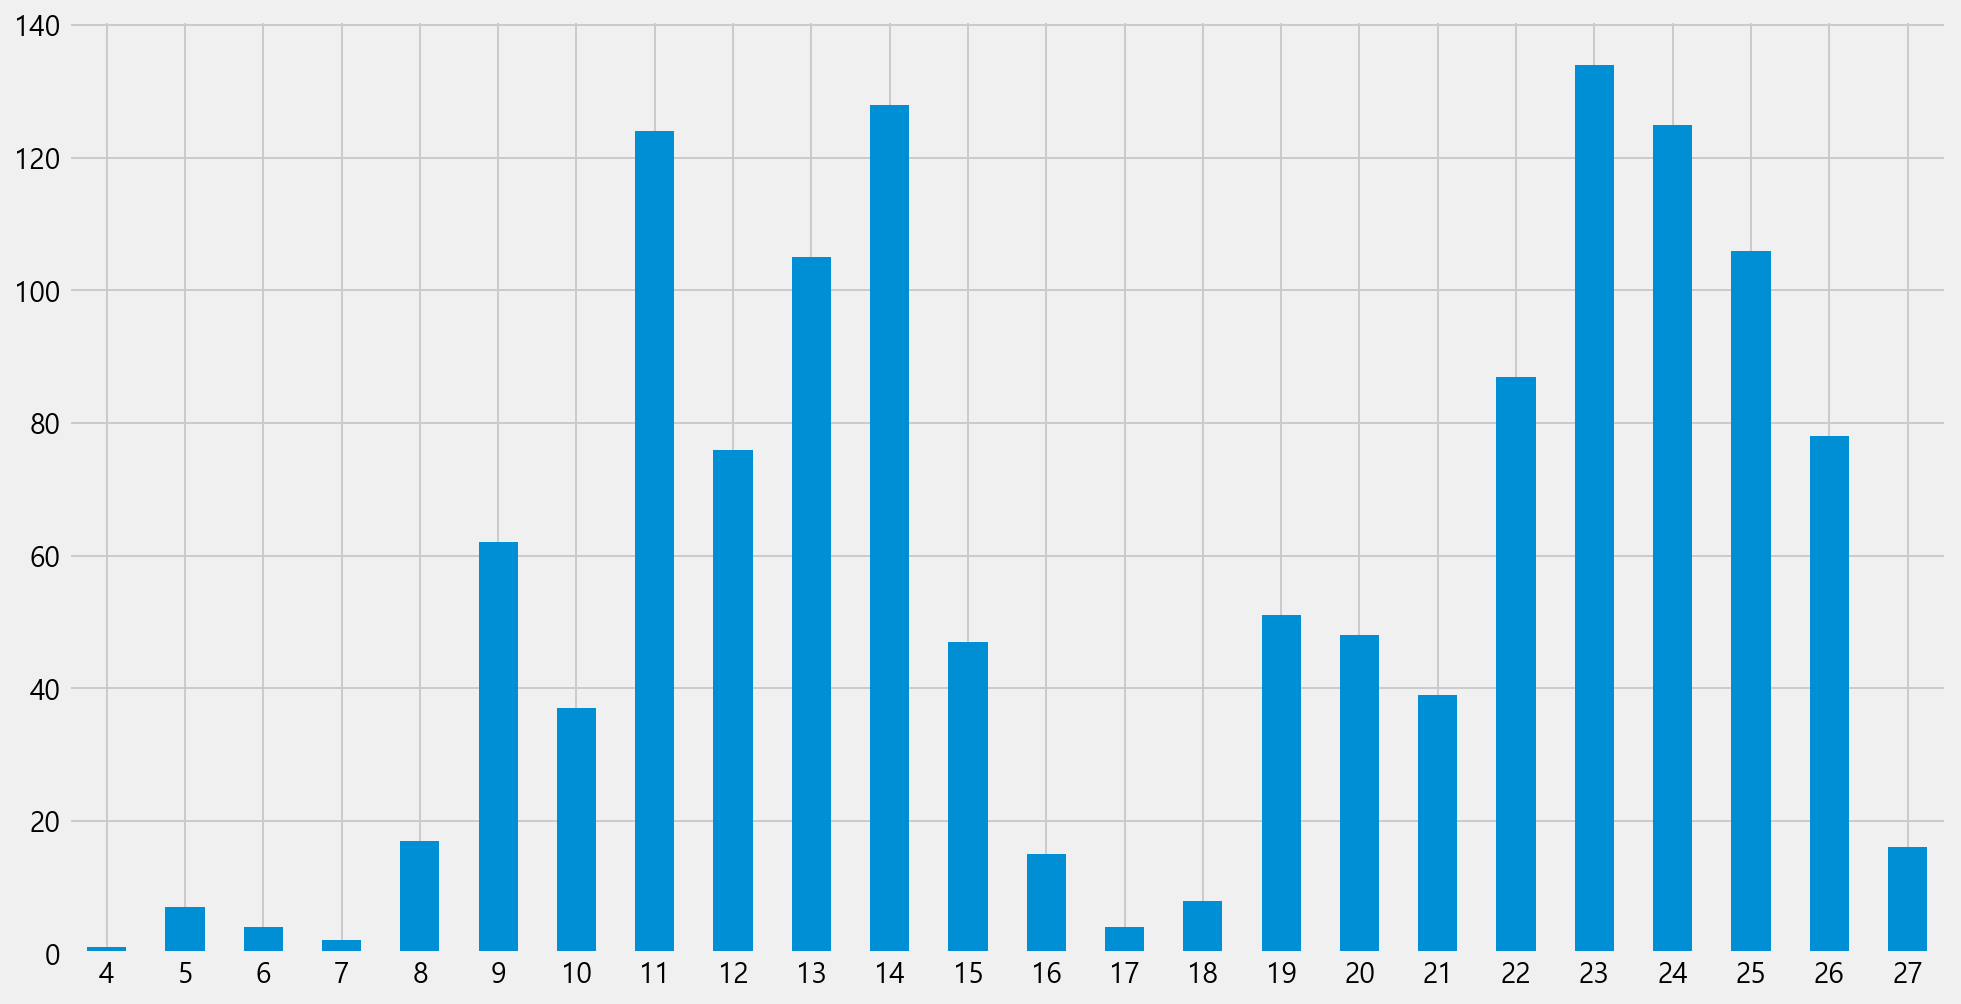

In [98]:
weekly_case.plot.bar(figsize = (15,8), rot=0)

In [103]:
# groupby를 통해 '월', '주'를 그룹화 하여 빈도수 계산

month_weekly_case = df.groupby(['월', '주'])['연번'].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

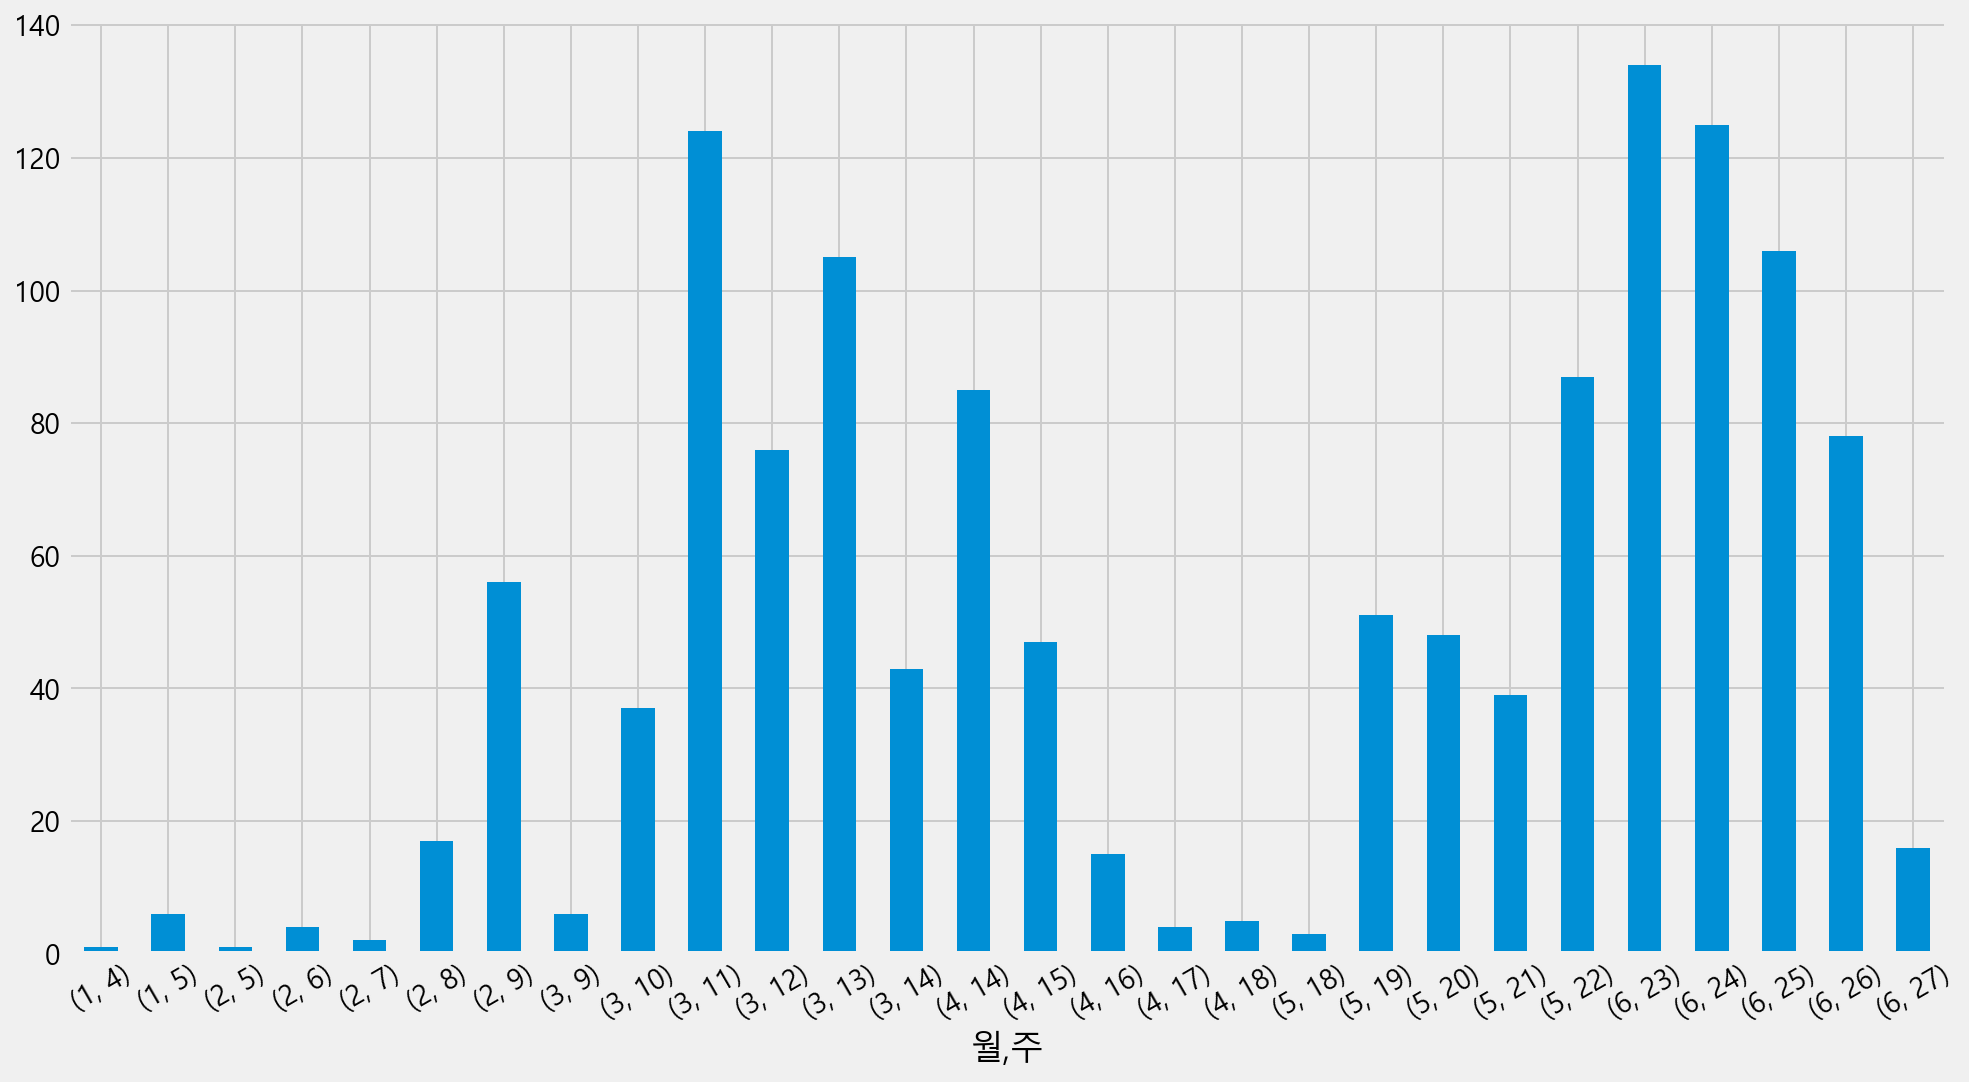

In [107]:
month_weekly_case.plot.bar(figsize = (15,8), rot = 30)